<a href="https://colab.research.google.com/github/Arpitapal30/Stable-Diffusion/blob/main/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stable Diffusion Setup

In [1]:
!nvidia-smi

Tue Oct  1 11:24:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -qU diffusers==0.11.1
#!pip install scipy==0.13.3
!pip install -qU transformers scipy ftfy accelerate
!pip install -qU invisible_watermark safetensors
!pip install --upgrade torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 79.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 90.1 MB/s eta 0:00:00


In [3]:
# Downgrading jax and jaxlib to avoid errors
!pip install jax==0.4.23 jaxlib==0.4.23

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.8.5 requires jax>=0.4.27, but you have jax 0.4.23 which is incompatible.
optax 0.2.3 requires jax>=0.4.27, but you have jax 0.4.23 which is incompatible.
optax 0.2.3 requires jaxlib>=0.4.27, but you have jaxlib 0.4.23 which is incompatible.
orbax-checkpoint 0.6.4 requires jax>=0.4.26, but you have jax 0.4.23 which is incompatible.


In [4]:
from transformers import pipeline
import torch

print(torch.__version__)

2.4.1+cu121


In [ ]:

from diffusers import DiffusionPipeline

In [1]:
!pip install --upgrade diffusers[torch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.11.1
    Uninstalling diffusers-0.11.1:
      Successfully uninstalled diffusers-0.11.1


In [2]:

import torch
from diffusers import StableDiffusionPipeline
model_name = 'stabilityai/stable-diffusion-2-1'
pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype = torch.float16)
# Convert the pipe to the CUDA language that is used by NVIDIA GPUs
pipe = pipe.to('cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
import random

In [4]:
import math

In [5]:

def gen_sd_img(prompt, negative_prompt = None, seed = 0):
  rnum = math.floor(random.random() * 1000000000)
  fseed = rnum
  if(seed != 'random'): fseed = seed

  image = pipe(prompt = prompt,
               negative_prompt = negative_prompt,
               num_inference_steps = 45,
               guidance_scale = 7,
               height = 768,
               width = 768,
               num_images_per_prompt = 1,
               generator = torch.Generator('cuda').manual_seed(fseed)).images[0]

  return image

  0%|          | 0/45 [00:00<?, ?it/s]

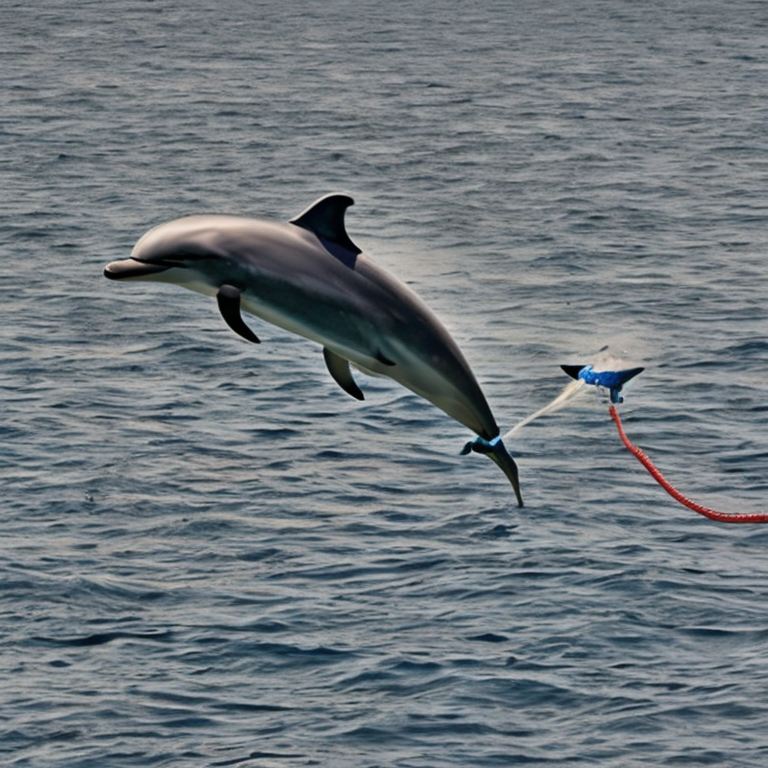

In [6]:
gen_sd_img(prompt = 'dolphin fly', seed = 0)

  0%|          | 0/45 [00:00<?, ?it/s]

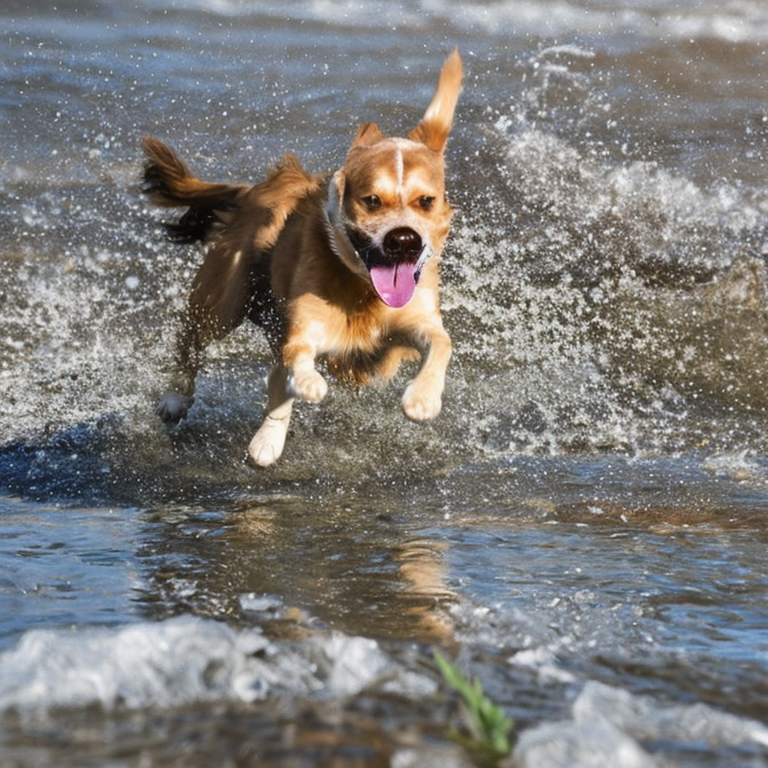

In [7]:
gen_sd_img(prompt = 'A dog running in the river.',seed = 358870059)

  0%|          | 0/45 [00:00<?, ?it/s]

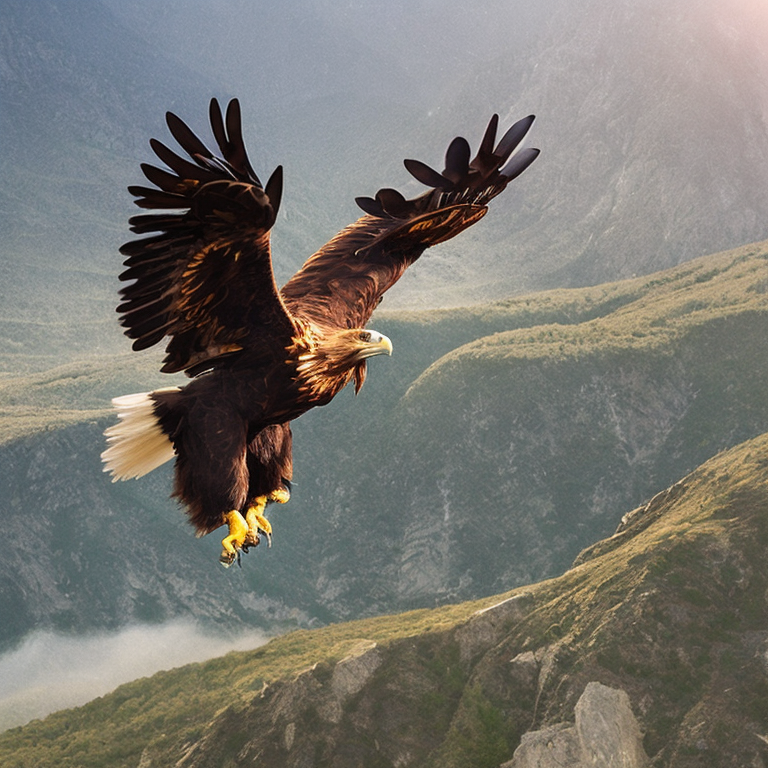

In [8]:
gen_sd_img(prompt = 'A majestic golden eagle soaring gracefully over a rugged mountain landscape, with its wings spread wide and sunlight gleaming off its feathers',
           seed = 358870059)

  0%|          | 0/45 [00:00<?, ?it/s]

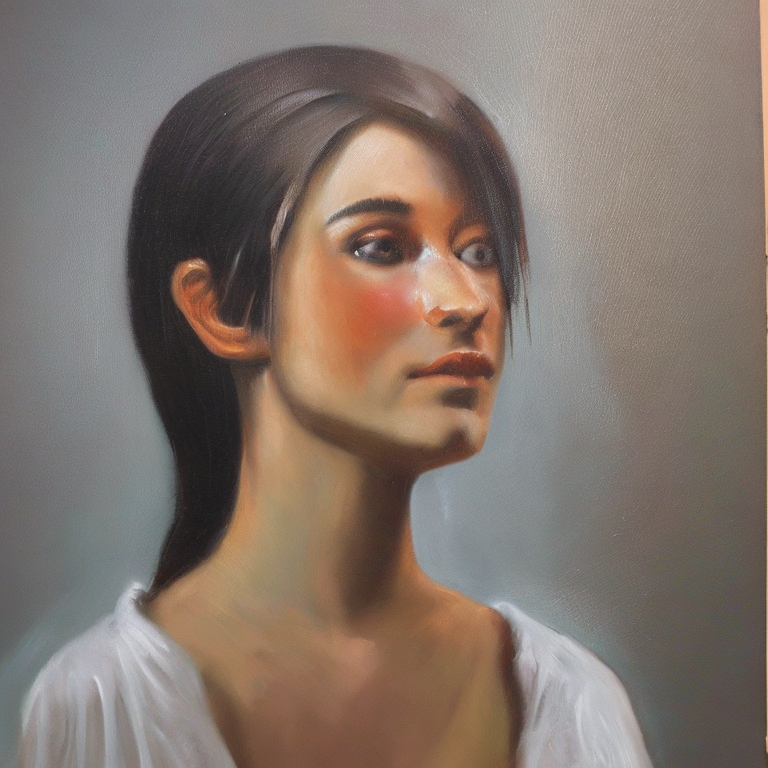

In [9]:
gen_sd_img(prompt = 'A woman, oil painting',
           seed = 358870059)

  0%|          | 0/45 [00:00<?, ?it/s]

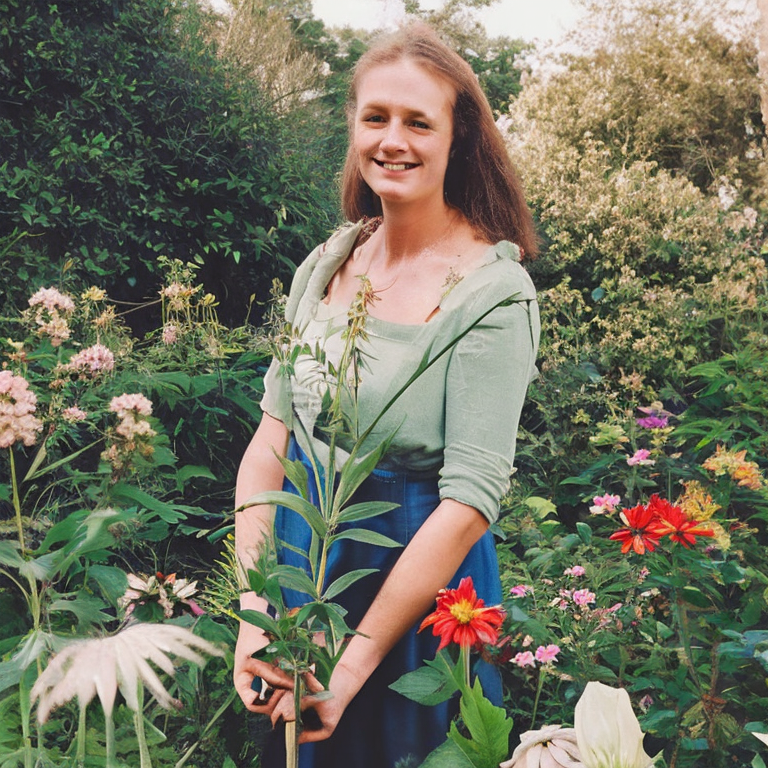

In [10]:
gen_sd_img(prompt = 'A woman standing in a garden holding a flower',
           seed = 358870059)

In [11]:
gen_sd_img(prompt = 'A woman standing in a garden holding a flower, in a surrealist style',
           seed = 358870059)

  0%|          | 0/45 [00:00<?, ?it/s]